<a href="https://colab.research.google.com/github/xvfdesii/034_Wa-Ode-Asriyani-Obesity-Classification-Tugas-1-Machine-Learning/blob/main/034_WA_ODE_ASRIYANI_Obesity%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
obs = pd.read_csv('/content/Obesity Classification.csv')

In [3]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [4]:
obs.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
obs.drop('ID',axis=1, inplace=True)

In [6]:
obs.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [8]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kategori menjadi angka
obs['Label'] = label_encoder.fit_transform(obs['Label'])

# Menampilkan nilai angka yang sesuai dengan kategorinya
print(label_encoder.classes_)


['Normal Weight' 'Obese' 'Overweight' 'Underweight']


In [9]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.2+ KB


In [10]:
obs.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,0
1,30,Female,160,60,22.5,0
2,35,Male,180,90,27.3,2
3,40,Female,150,50,20.0,3
4,45,Male,190,100,31.2,1


In [12]:
# Mengubah kategori menjadi angka
obs['Gender'] = label_encoder.fit_transform(obs['Gender'])

# Menampilkan nilai angka yang sesuai dengan kategorinya
print(label_encoder.classes_)


['Female' 'Male']


In [13]:
obs.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


In [19]:
#memisakhan atribut dengan label dimana x itu atribut dan y itu label
X = obs[['Age','Gender','Height', 'Weight','BMI']]
y = obs['Label']


#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [20]:
from sklearn.tree import DecisionTreeClassifier

#menentukan  model decision tree
tree_model= DecisionTreeClassifier()

#melatih model menggunakan data latih dengan fungsi fit
tree_model= tree_model.fit(X_train,y_train)

In [21]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi

from sklearn.metrics import accuracy_score

y_pred =  tree_model.predict(X_test)

accuracy_score =round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ',accuracy_score)

Accuracy:  0.955


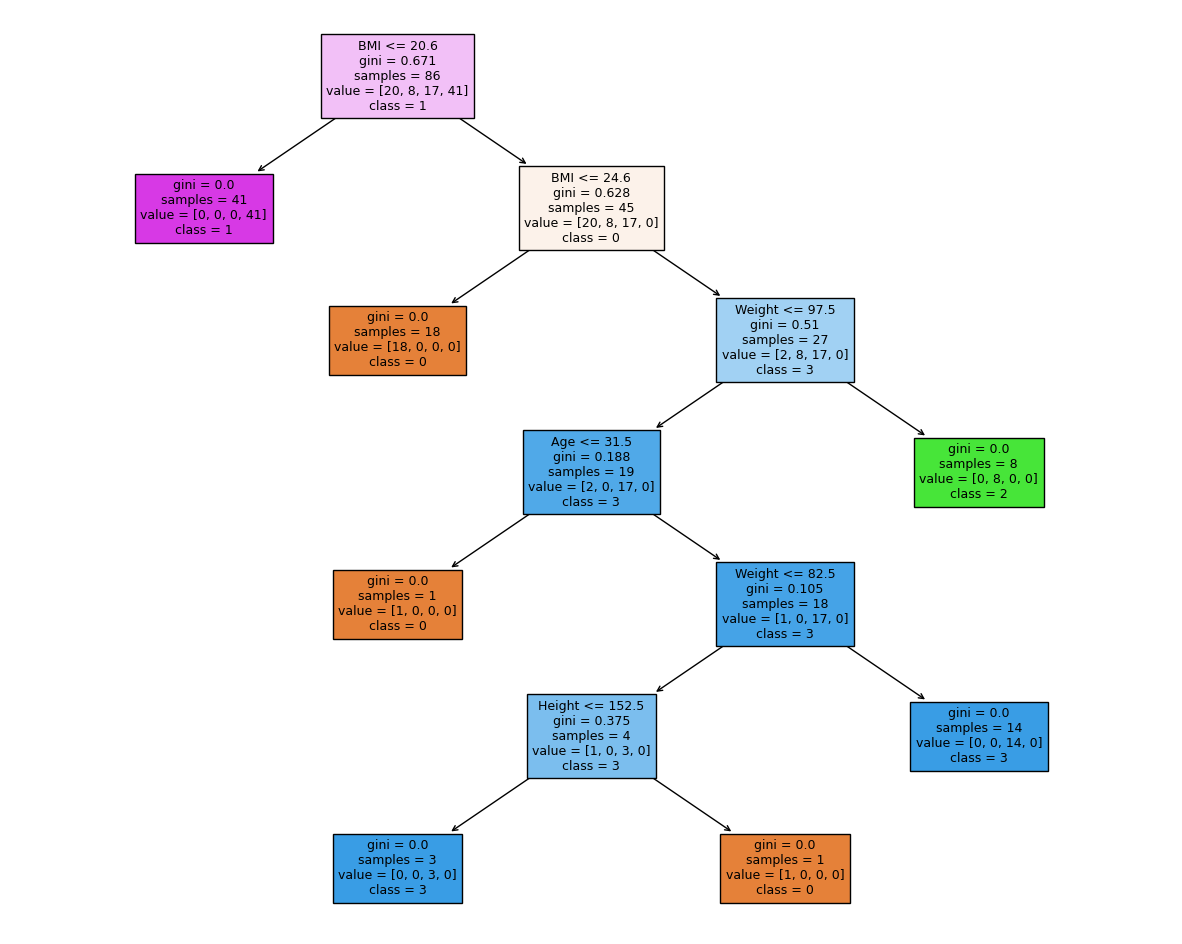

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Mengonversi kelas unik dalam kolom label menjadi string
class_names = [str(c) for c in y.unique()]

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 12))
plot_tree(tree_model, feature_names=X.columns, class_names=class_names, filled=True, fontsize=9)
plt.show()
